# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
#your code here
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
spaceship.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
spaceship.dropna(inplace=True)
spaceship["Cabin"] = spaceship["Cabin"].str[0]


from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse_output=False)
columns_to_encode = [
    'HomePlanet',
    'Cabin',
    'Destination']

ohe.fit(spaceship[columns_to_encode])
spaceship_np = ohe.transform(spaceship[columns_to_encode])
spaceship_df = pd.DataFrame(spaceship_np, columns=ohe.get_feature_names_out(), index=spaceship.index)

other_columns = spaceship.drop(columns=columns_to_encode)
final_df = pd.concat([other_columns, spaceship_df], axis=1)

final_df['CryoSleep'] = final_df['CryoSleep'].astype(int)
final_df['VIP'] = final_df['VIP'].astype(int)
final_df['Transported'] = final_df['Transported'].astype(int)

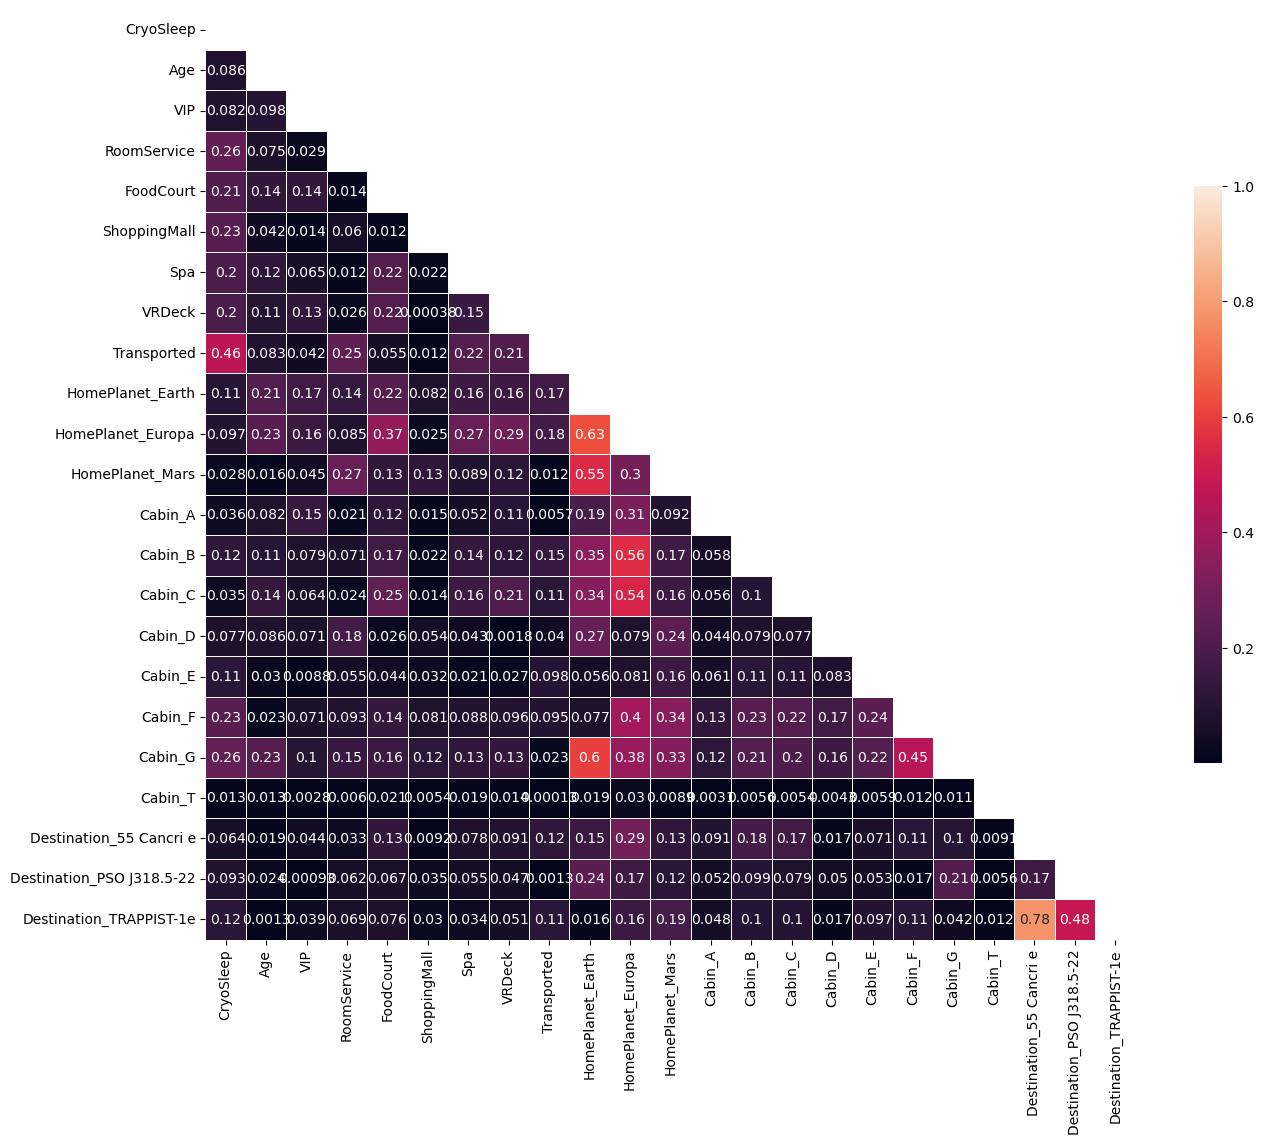

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=np.abs(final_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [9]:
features = final_df.drop(columns = ["Transported"])
target = final_df["Transported"]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )

x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100, # number of models to use
                               max_samples = 1000)
bagging_reg.fit(x_train_norm, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

- Evaluate your model

In [13]:
#your code here
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
y_pred_test_bag = bagging_reg.predict(x_test_norm)

print(f"MAE {mean_absolute_error(y_pred_test_bag, y_test): .2f}")
print(f"MSE {mean_squared_error(y_pred_test_bag, y_test): .2f}")
print(f"RMSE {root_mean_squared_error(y_pred_test_bag, y_test): .2f}")
print(f"R2 score {bagging_reg.score(x_test_norm, y_test): .2f}")

MAE  0.28
MSE  0.14
RMSE  0.38
R2 score  0.43


**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [24]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
import optuna.visualization as vis
import time

import scipy.stats as st

# First we need to setup a dicstionary with all the values that we want to try for each hyperparameter

parameter_grid = {"estimator__max_depth": [10, 20],
    "estimator__min_samples_split": [2, 5]}

# We create an instance or our machine learning model
#dt = DecisionTreeRegressor(random_state=133)
dt = bagging_reg
# We need to set this two variables to be able to compute a confidence interval
confidence_level = 0.95 # confidence_level = 1 - alpha
folds = 10


- Run Grid Search

In [25]:
# Now we need to create an intance of the GridSearchCV class
# The option "scoring", alongside with new_metric ="make_scorer" allows you to evaluate the model performance using a different error metrics.
gs = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, verbose=10) # Here the "cv" allows you to define the number of folds to use.

start_time = time.time()
gs.fit(x_train_norm, y_train)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {gs.best_params_}")
print(f"The R2 is: {gs.best_score_: .4f}")

results_gs_df = pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score", ascending=False)

gs_mean_score = results_gs_df.iloc[0,-3]
gs_sem = results_gs_df.iloc[0,-2] / np.sqrt(folds) # ( std / sqrt(folds))

# Getting the critical value.
gs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
gs_lower_bound = gs_mean_score - ( gs_tc * gs_sem )
gs_upper_bound = gs_mean_score + ( gs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")

# Let's store the best model
best_model = gs.best_estimator_

# Now is time evaluate the model in the test set
y_pred_train_df = best_model.predict(x_train_norm)
y_pred_test_df  = best_model.predict(x_test_norm)

print("\n")
print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .4f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test RMSE: {root_mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test R2 score:  {best_model.score(x_test_norm, y_test): .4f}")
print("\n")

<>:27: SyntaxWarning: invalid escape sequence '\('
<>:27: SyntaxWarning: invalid escape sequence '\('
C:\Users\jtrin\AppData\Local\Temp\ipykernel_2220\2516218073.py:27: SyntaxWarning: invalid escape sequence '\('
  print(f"The R2 confidence interval for the best combination of hyperparameters is: \({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10; 1/4] START estimator__max_depth=10, estimator__min_samples_split=2....
[CV 1/10; 1/4] END estimator__max_depth=10, estimator__min_samples_split=2;, score=0.434 total time=   9.4s
[CV 2/10; 1/4] START estimator__max_depth=10, estimator__min_samples_split=2....
[CV 2/10; 1/4] END estimator__max_depth=10, estimator__min_samples_split=2;, score=0.504 total time=   8.5s
[CV 3/10; 1/4] START estimator__max_depth=10, estimator__min_samples_split=2....
[CV 3/10; 1/4] END estimator__max_depth=10, estimator__min_samples_split=2;, score=0.485 total time=   6.3s
[CV 4/10; 1/4] START estimator__max_depth=10, estimator__min_samples_split=2....
[CV 4/10; 1/4] END estimator__max_depth=10, estimator__min_samples_split=2;, score=0.475 total time=  11.8s
[CV 5/10; 1/4] START estimator__max_depth=10, estimator__min_samples_split=2....
[CV 5/10; 1/4] END estimator__max_depth=10, estimator__min_samples_split=2;, score=0.408 total time=  

- Evaluate your model

In [26]:
# Now is time evaluate the model in the test set
y_pred_train_df = best_model.predict(x_train_norm)
y_pred_test_df  = best_model.predict(x_test_norm)

print("\n")
print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .4f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test RMSE: {root_mean_squared_error(y_pred_test_df, y_test): .4f}")
print(f"Test R2 score:  {best_model.score(x_test_norm, y_test): .4f}")
print("\n")



Test MAE:  0.2764
Test MSE:  0.1408
Test RMSE:  0.3752
Test R2 score:   0.4368


